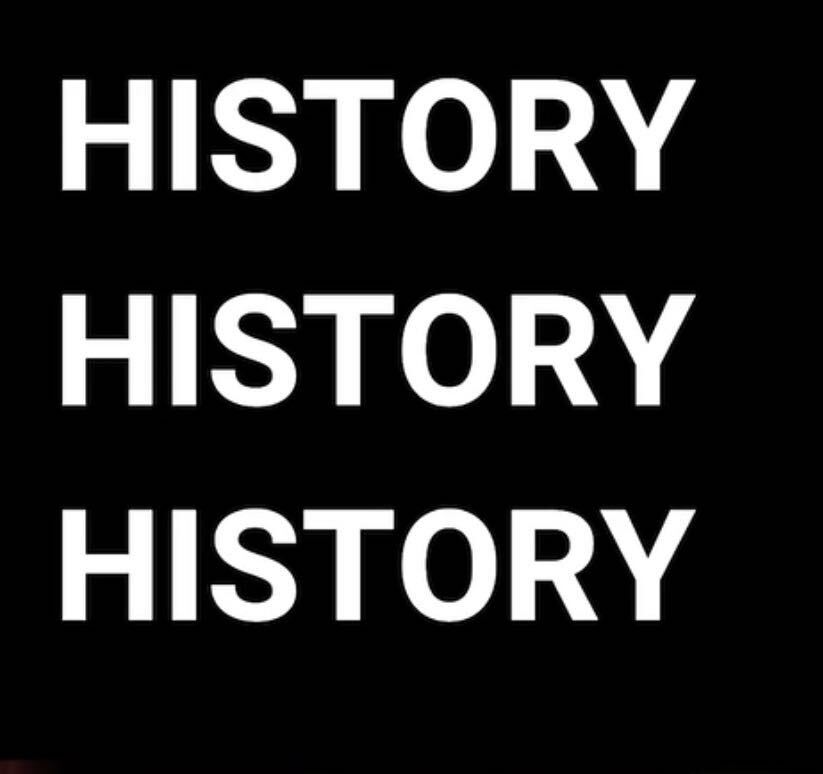
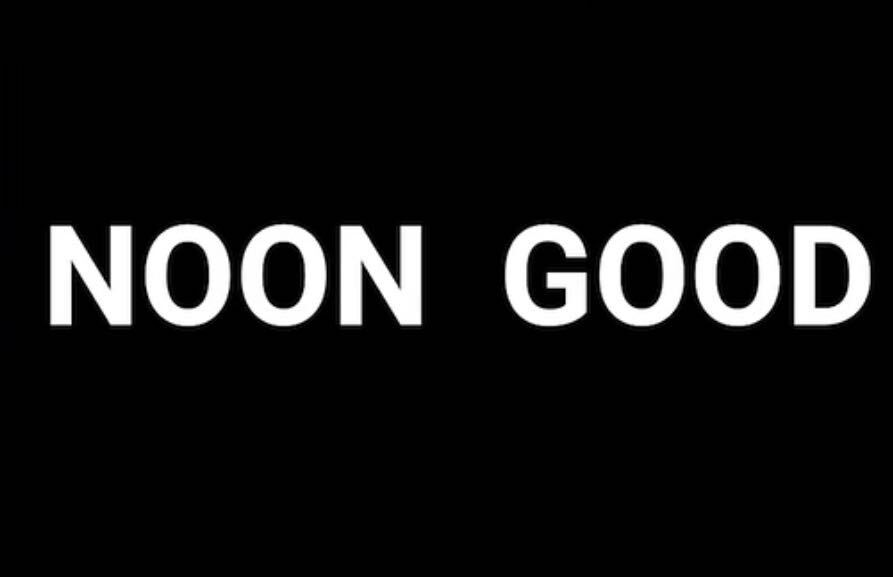
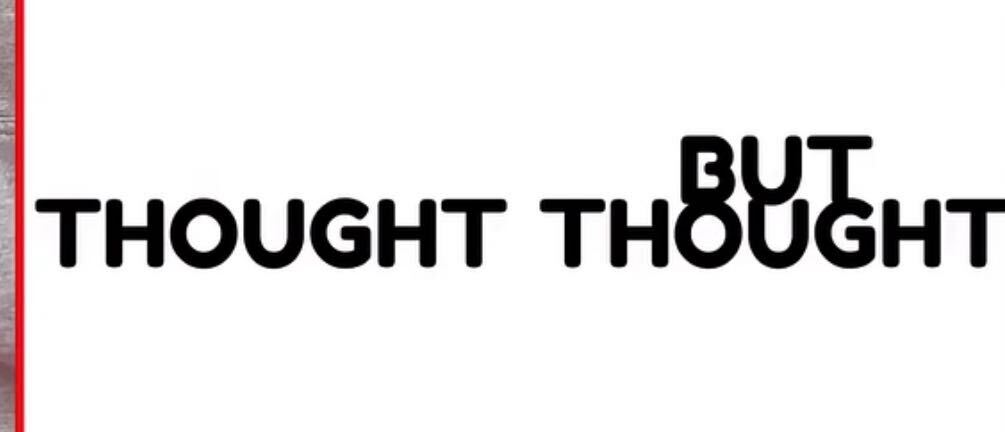

## Machine Learning Fundamentals.
What is machine learning?

Inference vs prediction?

Unlike inferential modelling where we look at how well the model fits to the training data, the primary consideration when doing **predictive modelling** is model `generalization.`

How do we assess generalization of a model?

### Model Validation
* Train-test split
* Cross-validation

Underfitting, overfitting also known as bias and variance.

Bias-variance tradeoff...

#### Regularization
This is an extension of linear regression that includes penalty terms to help prevent overfitting.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load dataset
df = pd.read_csv('./fish.csv')

df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
df_ohe = pd.get_dummies(df)

df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             159 non-null    float64
 1   Length1            159 non-null    float64
 2   Length2            159 non-null    float64
 3   Length3            159 non-null    float64
 4   Height             159 non-null    float64
 5   Width              159 non-null    float64
 6   Species_Bream      159 non-null    bool   
 7   Species_Parkki     159 non-null    bool   
 8   Species_Perch      159 non-null    bool   
 9   Species_Pike       159 non-null    bool   
 10  Species_Roach      159 non-null    bool   
 11  Species_Smelt      159 non-null    bool   
 12  Species_Whitefish  159 non-null    bool   
dtypes: bool(7), float64(6)
memory usage: 8.7 KB


In [8]:
df_Ohe2 = pd.get_dummies(df, drop_first=True)

df_Ohe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             159 non-null    float64
 1   Length1            159 non-null    float64
 2   Length2            159 non-null    float64
 3   Length3            159 non-null    float64
 4   Height             159 non-null    float64
 5   Width              159 non-null    float64
 6   Species_Parkki     159 non-null    bool   
 7   Species_Perch      159 non-null    bool   
 8   Species_Pike       159 non-null    bool   
 9   Species_Roach      159 non-null    bool   
 10  Species_Smelt      159 non-null    bool   
 11  Species_Whitefish  159 non-null    bool   
dtypes: bool(6), float64(6)
memory usage: 8.5 KB


In [9]:
df_Ohe2.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,False,False,False,False,False,False


In [11]:
df_Ohe2.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [12]:
#modelling
from sklearn.model_selection import train_test_split


#independent and dependent variables
X = df_Ohe2.drop('Weight', axis=1)
y = df_Ohe2['Weight']

In [13]:
x_train, x_test, y_train, y_test  =  train_test_split(X, y, test_size=0.2, random_state=42)

x_train.head()

,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
75,15.0,16.2,17.2,4.5924,2.6316,False,True,False,False,False,False
138,43.2,46.0,48.7,7.7920,4.8700,False,False,True,False,False,False
2,23.9,26.5,31.1,12.3778,4.6961,False,False,False,False,False,False
86,20.0,22.0,23.5,6.1100,3.4075,False,True,False,False,False,False
45,20.5,22.5,25.3,7.0334,3.8203,False,False,False,True,False,False


In [14]:
x_train.shape

(127, 11)

In [15]:
x_test.shape

(32, 11)

In [16]:
y_train.head()

75      51.5
138    567.0
2      340.0
86     120.0
45     160.0
Name: Weight, dtype: float64

In [35]:
x_train1, x_test1, y_train1, y_test1  =  train_test_split(X, y, train_size=0.8, random_state=44799)

x_train1.head()

,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
127,41.1,44.0,46.6,12.4888,7.5958,False,True,False,False,False,False
17,30.4,33.0,38.5,14.9380,5.1975,False,False,False,False,False,False
61,13.5,14.7,16.5,6.8475,2.3265,True,False,False,False,False,False
95,21.5,23.5,25.0,6.2750,3.7250,False,True,False,False,False,False
14,29.4,32.0,37.2,14.9544,5.1708,False,False,False,False,False,False


In [37]:
from sklearn.linear_model import LinearRegression


#instantiate the model
lr = LinearRegression()

#training our model
lr.fit(x_train, y_train)

LinearRegression()

In [38]:
#x_test, y_test
y_preds = lr.predict(x_test)


y_preds

array([  18.73825424,   11.88642049,  187.71128095,  332.73989462,
        212.09701648,  757.76161609,  -61.14301932,  255.77252524,
        260.49479187, 1148.32283034,  600.42812967,  852.95666864,
        541.6348983 ,  140.05796526,  680.96324928,  818.78498332,
       1009.77141718,  289.70475993,  226.06716705,  585.13887424,
        -11.02265194,  585.70704112,  509.58219989,  492.02110639,
        814.27086551,  964.09005079,  219.24045431,  356.93819832,
        -90.40664262,  -11.87462241,  575.80799591,  -18.41252664])

In [45]:
y_test

78       78.0
155      13.4
128     200.0
55      270.0
94      150.0
29     1000.0
147       7.0
51      180.0
98      188.0
141    1250.0
19      650.0
60     1000.0
15      600.0
65      150.0
24      700.0
30      920.0
126    1000.0
101     218.0
96      225.0
16      700.0
151      10.0
18      610.0
12      500.0
9       500.0
31      955.0
125    1100.0
95      170.0
56      270.0
145       6.7
152       9.9
135     510.0
76       70.0
Name: Weight, dtype: float64

In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


r2 = r2_score(y_test, y_preds)
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'This is R2 score: {r2},\n Mean absolute error: {mae}\n Mean Squared Error: {mse},\n Root Mean Squared Error: {rmse}')

This is R2 score: 0.950735248005452,
 Mean absolute error: 65.30005153357361
 Mean Squared Error: 7007.383189853839,
 Root Mean Squared Error: 83.7101140236581


In [44]:
df['Weight'].describe()

count     159.000000
mean      398.326415
std       357.978317
min         0.000000
25%       120.000000
50%       273.000000
75%       650.000000
max      1650.000000
Name: Weight, dtype: float64